In [1]:
import site
site.addsitedir("./illustris_python/") 

import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
from nbodykit.lab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
font = {'family' : 'serif',
        'size'   : 20}
mpl.rc('font', **font)

size=128

/home/toshiba/Software/Anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
filename='dm_pos_density_SNAP135_s'+str(size)+'.h5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['density'].shape)

['density']
(128, 128, 128)


In [3]:
density=f['density']
density=np.array(density)
print(density.shape)

(128, 128, 128)


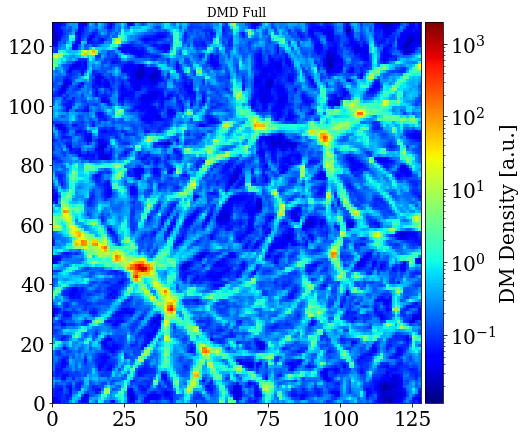

In [4]:
fig = plt.figure(figsize=(7, 7))
plt.jet()
plt.title("DMD Full")
ax=plt.gca()
plt.pcolor(density[1], norm=mpl.colors.LogNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('DM Density [a.u.]', size=20)
plt.show()

In [5]:
basePath = '../Illustris-3'
halos = il.groupcat.loadHalos(basePath, 135, fields=None)

../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.1.hdf5


In [6]:
print(halos.keys())
print(halos['GroupMass'].shape)
print(halos['GroupPos'].shape)

dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
(131727,)
(131727, 3)


In [7]:
halos_mass = halos['Group_M_Crit200']*1e10/0.704
halos_pos = halos['GroupPos']
print(halos_mass.shape)
print(halos_pos.shape)

(131727,)
(131727, 3)


In [8]:
Delta=75000/size  #Las posiciones de las galaxias van entre 0-75000, convierto esa distancia en posición del mesh
# print(Delta)
# print(gas_pos.shape)
if halos_pos[0][0]>size: # Está normalizada a size?
    halos_pos=np.array(halos_pos)/Delta
if halos_pos.shape != (131727,3):
    halos_pos=gas_pos.T
print(halos_pos.astype(int))

[[  1  44  31]
 [ 33  81  83]
 [ 18  86  81]
 ...
 [109  53  67]
 [110 124  91]
 [105 113  55]]


In [9]:
print(density.ravel().shape)            
print(halos_pos.shape)

HM=np.ones(size**3)
HM=HM.reshape((size,size,size))

X=halos_pos.T[0].astype(int)
Y=halos_pos.T[1].astype(int)
Z=halos_pos.T[2].astype(int)
print(len(X))

for i in range(0,len(X)):
    HM[X[i]][Y[i]][Z[i]]=HM[X[i]][Y[i]][Z[i]]+halos_mass[i]
    
data=[]
for i in range(size):
    for j in range(size):
        for k in range(size):
            data.append([i,j,k,HM[i][j][k],density[i][j][k]])

data=np.array(data)

(2097152,)
(131727, 3)
131727


In [10]:
print("Making Data 3D...")
print(data.shape)
print(sum(halos_mass))
print(sum(data.T[3]))
print(sum(data.T[4]))
print(data.T[3].shape)
print(data.T[4].shape)
print(HM.shape)
print(density.shape)
# print(np.log(HM))

Making Data 3D...
(2097152, 5)
1.291327648426176e+16
1.2913276485625444e+16
2097148.8715366628
(2097152,)
(2097152,)
(128, 128, 128)
(128, 128, 128)


In [11]:
f=h5py.File('data_HMass-DenDM_s'+str(size)+'.h5','w')
f.create_dataset('nx',data=data.T[0])
f.create_dataset('ny',data=data.T[1])
f.create_dataset('nz',data=data.T[2])
f.create_dataset('HM',data=data.T[3])
f.create_dataset('DMD',data=data.T[4])
f.close()

In [12]:
f=h5py.File('data_HMass-DenDM_s'+str(size)+'_V.h5','w')
f.create_dataset('HM',data=HM)
f.create_dataset('DMD',data=density)
f.close()

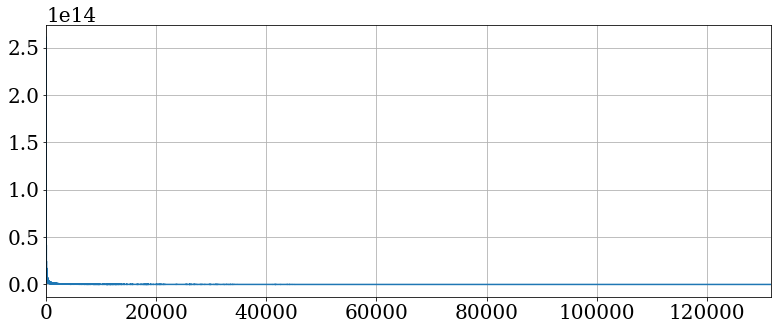

In [13]:
x_mass=np.arange(len(halos_mass))
fig = plt.figure(figsize=(13, 5))
plt.plot(x_mass,halos_mass)
plt.xlim(min(x_mass),max(x_mass))
plt.grid()
plt.show()

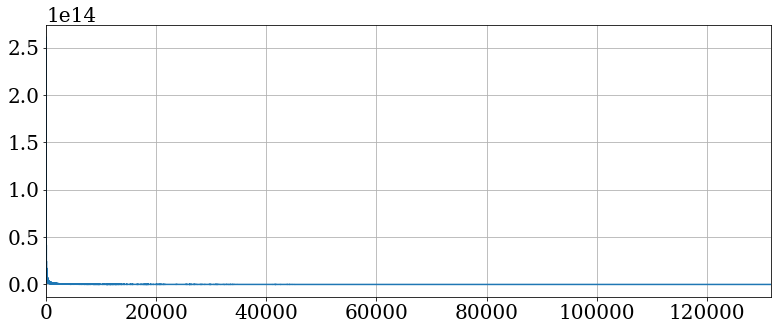

In [14]:
x_mass=np.arange(len(halos_mass))
fig = plt.figure(figsize=(13, 5))
plt.plot(x_mass,halos_mass)
plt.xlim(min(x_mass),max(x_mass))
plt.grid()
plt.show()

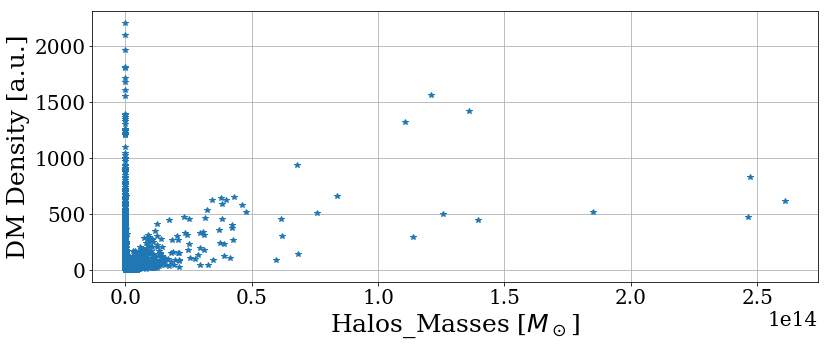

In [15]:
fig = plt.figure(figsize=(13, 5))
plt.plot(data.T[3],data.T[4],"*")
plt.xlabel("Halos_Masses [$M_\odot$]",size=25)
plt.ylabel("DM Density [a.u.]",size=25)
plt.grid()
plt.savefig("./Figures_data_HMass-DenDM/DMD_HM_s"+str(size), bbox_inches = 'tight')
plt.show()

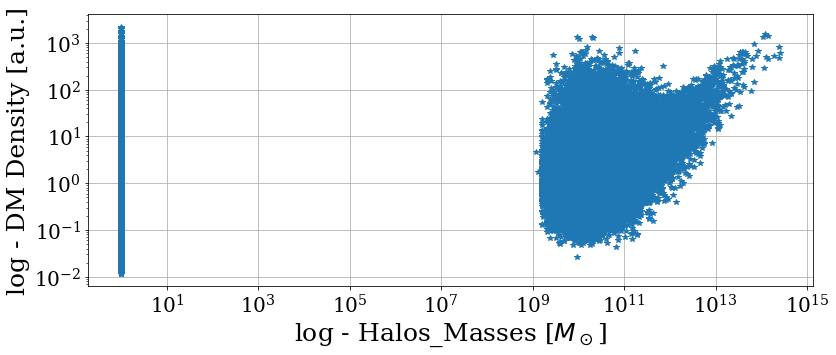

In [16]:
fig = plt.figure(figsize=(13, 5))
plt.plot(data.T[3],data.T[4],"*")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log - Halos_Masses [$M_\odot$]",size=25)
plt.ylabel("log - DM Density [a.u.]",size=25)
plt.grid()
plt.savefig("./Figures_data_HMass-DenDM/logDMD_logHM_s"+str(size), bbox_inches = 'tight')
plt.show()

In [17]:
filename='data_HMass-DenDM_s'+str(size)+'_V.h5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
DMD=f['DMD']
HM=f['HM']
DMD=np.array(DMD)
HM=np.array(HM)
f.close()

print(DMD.shape)
print(HM.shape)

['DMD', 'HM']
(128, 128, 128)
(128, 128, 128)
